# Apprentissage Automatique TP5


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import time
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
def load_CSV_dataset(name):
    df=pd.read_csv(name)
    if(name=="diabetes.csv"):
        df=df.replace('tested_positive',1)
        df=df.replace('tested_negative',0)
    if(name=="heart.csv"):
        df=df.replace('present',1)
        df=df.replace('absent',0)
    if(name=="segment.csv"):
        df=df.replace({'path':0, 'foliage':1, 'sky':2, 'grass':3, 'brickface':4, 'cement':5, 'window':6})
    if(name=="vehicle.csv"):
        df=df.replace({'van':0, 'saab':1, 'bus':2, 'opel':3})
                                
    X=df.iloc[:,:-1]
    y=df.iloc[: , -1]
    return X,y

In [3]:
def split_dataset(X, y):
    return train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)


In [9]:
def run_logreg(data):
    model = LogisticRegression(max_iter=10000)
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2','l1']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = KFold(n_splits=5)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(data[0], data[2].values.ravel())
    # summarize results
    print("Logistic Regression Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    y_pred=grid_search.predict(data[1])
    return y_pred

In [10]:
def run_linsvm(data):
    param_grid = {'C': [0.001,0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'],'tol':[0.0001,0.001,0.01,0.1,1]
              }
    model = LinearSVC(max_iter=10000,dual=False)
    cv = KFold(n_splits=5)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(data[0], data[2].values.ravel())
    # summarize results
    print("LinearSVM Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    y_pred=grid_search.predict(data[1])
    return y_pred

In [11]:
def run_rbfsvm(data):
    param_grid = {'C': [0.001,0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
              }
    model = SVC(max_iter=10000)
    cv = KFold(n_splits=5)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(data[0], data[2].values.ravel())
    # summarize results
    print(" RBF_SVM Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    y_pred=grid_search.predict(data[1])
    return y_pred

In [12]:
def process_results(res_logreg , res_linsvm , res_rbfsvm,name,y_true):
    print("le modele logistic regression a pour accuracy pour le dataset ", name, " : ",accuracy_score(y_true,res_logreg[len(res_logreg)-1]))
    print("le modele LinearSVM a pour accuracy pour le dataset ", name, " : ",accuracy_score(y_true,res_linsvm[len(res_linsvm)-1]))
    print("le modele RBF_SVM a pour accuracy pour le dataset ", name, " : ",accuracy_score(y_true,res_rbfsvm[len(res_rbfsvm)-1]))
    print("_______________________________________________________________________________")
    print("CONFUSION MTARICES")
    cf_matrix = confusion_matrix(res_logreg[len(res_logreg)-1], y_true)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels for the dataset '+name+' using logistic regression\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    cf_matrix = confusion_matrix(res_linsvm[len(res_linsvm)-1], y_true)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels for the dataset '+name+' using linearSVM\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    cf_matrix = confusion_matrix(res_rbfsvm[len(res_rbfsvm)-1], y_true)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels for the dataset '+name+' using RBF_SVM\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    print("_________________________________________________________________________________")
    print("CLASSIFICATION REPORTS")
    print("classification report for the dataset ",name, "with the logistic Regression")
    print(classification_report(y_true, res_logreg[len(res_logreg)-1]))
    print("classification report for the dataset ",name, "with the linearSVM")
    print(classification_report(y_true, res_linsvm[len(res_linsvm)-1]))
    print("classification report for the dataset ",name, "with the RBF_SVM")
    print(classification_report(y_true, res_rbfsvm[len(res_rbfsvm)-1]))

heart.csv
Logistic Regression Best: 0.833404 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
LinearSVM Best: 0.852008 using {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
 RBF_SVM Best: 0.791755 using {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
7.440158128738403
le modele logistic regression a pour accuracy pour le dataset  heart.csv  :  0.9074074074074074
le modele LinearSVM a pour accuracy pour le dataset  heart.csv  :  0.8888888888888888
le modele RBF_SVM a pour accuracy pour le dataset  heart.csv  :  0.7407407407407407
_______________________________________________________________________________
CONFUSION MTARICES


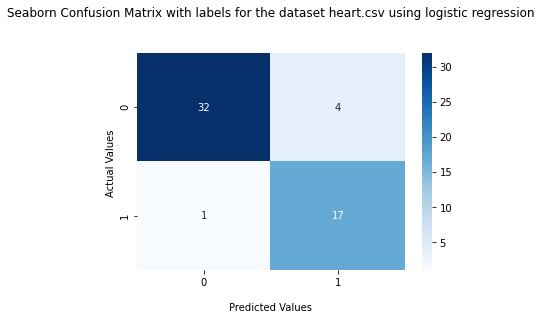

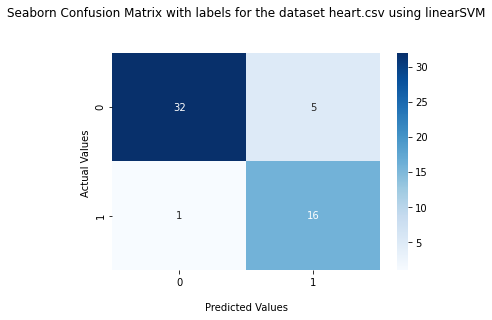

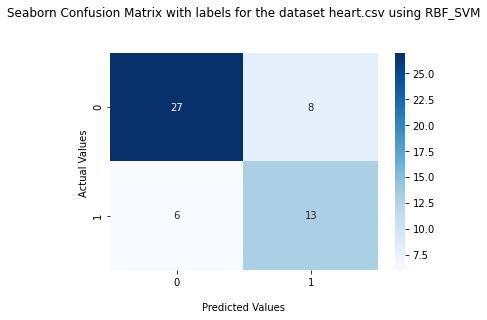

_________________________________________________________________________________
CLASSIFICATION REPORTS
classification report for the dataset  heart.csv with the logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

classification report for the dataset  heart.csv with the linearSVM
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

classification report for the dataset  heart.csv with the RBF_SVM
              precision    re

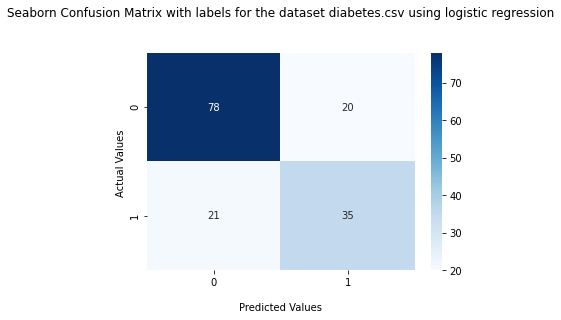

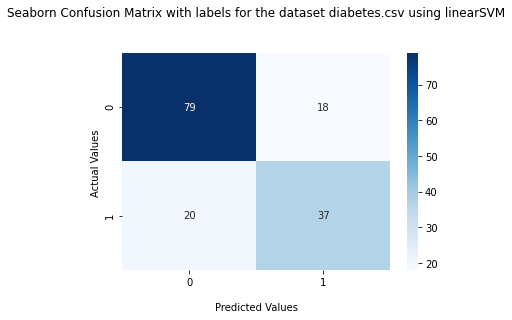

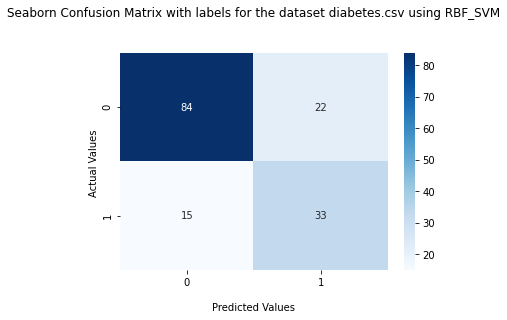

_________________________________________________________________________________
CLASSIFICATION REPORTS
classification report for the dataset  diabetes.csv with the logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

classification report for the dataset  diabetes.csv with the linearSVM
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

classification report for the dataset  diabetes.csv with the RBF_SVM
              precis

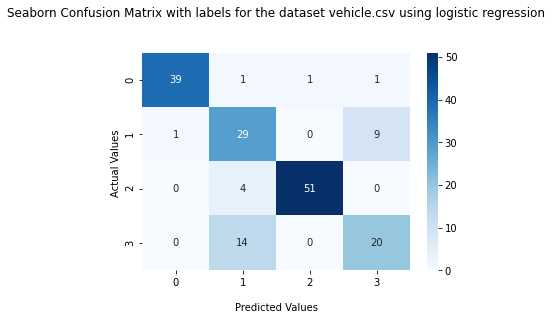

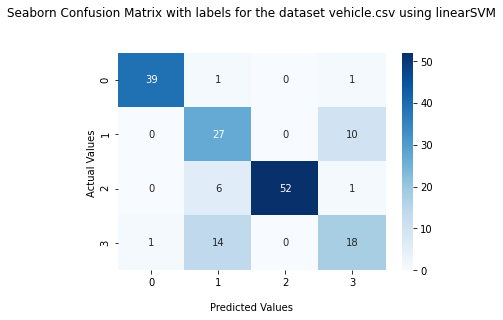

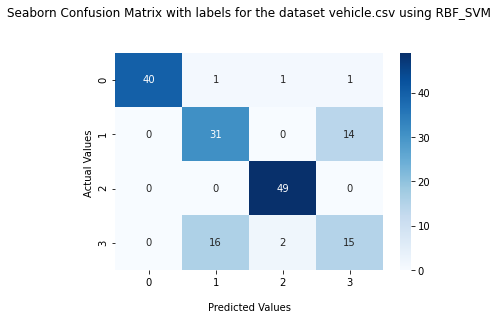

_________________________________________________________________________________
CLASSIFICATION REPORTS
classification report for the dataset  vehicle.csv with the logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.74      0.60      0.67        48
           2       0.93      0.98      0.95        52
           3       0.59      0.67      0.62        30

    accuracy                           0.82       170
   macro avg       0.80      0.81      0.80       170
weighted avg       0.82      0.82      0.81       170

classification report for the dataset  vehicle.csv with the linearSVM
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.73      0.56      0.64        48
           2       0.88      1.00      0.94        52
           3       0.55      0.60      0.57        30

    accuracy                          

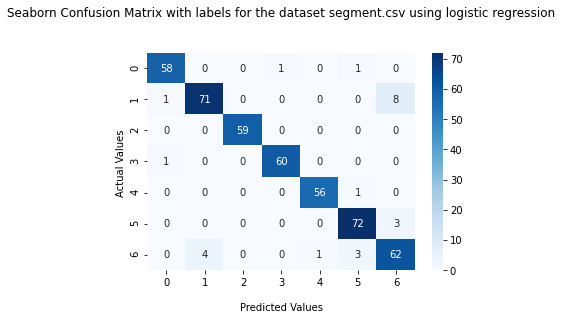

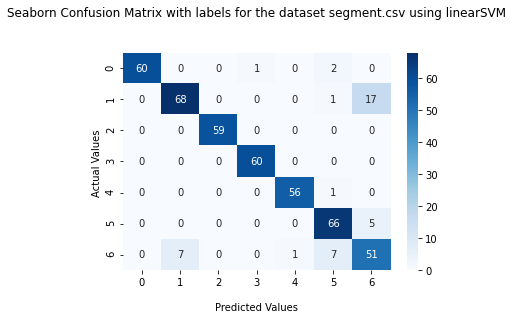

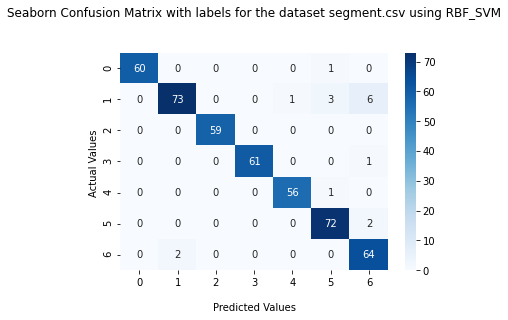

_________________________________________________________________________________
CLASSIFICATION REPORTS
classification report for the dataset  segment.csv with the logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.89      0.95      0.92        75
           2       1.00      1.00      1.00        59
           3       0.98      0.98      0.98        61
           4       0.98      0.98      0.98        57
           5       0.96      0.94      0.95        77
           6       0.89      0.85      0.87        73

    accuracy                           0.95       462
   macro avg       0.95      0.95      0.95       462
weighted avg       0.95      0.95      0.95       462

classification report for the dataset  segment.csv with the linearSVM
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.79      0.91      

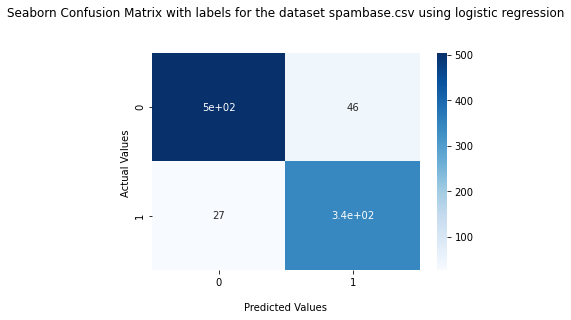

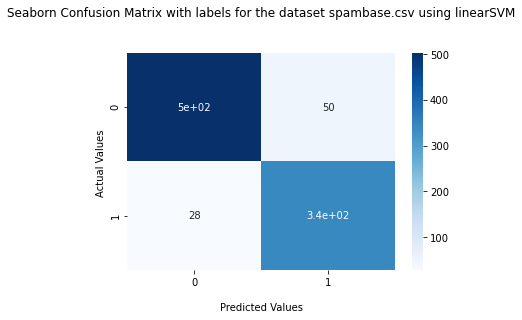

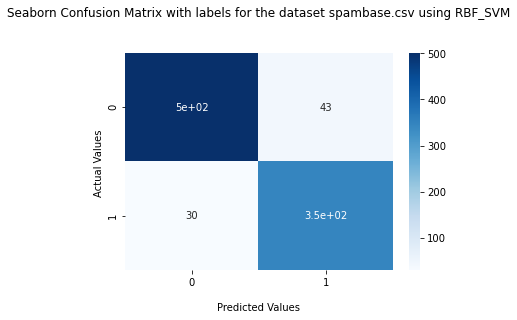

_________________________________________________________________________________
CLASSIFICATION REPORTS
classification report for the dataset  spambase.csv with the logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

classification report for the dataset  spambase.csv with the linearSVM
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.92      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.91       921

classification report for the dataset  spambase.csv with the RBF_SVM
              precis

In [13]:
if __name__ == '__main__':
    ds_names = ["heart", "diabetes" ,"vehicle", "segment", "spambase"]
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    for name in ds_names:
        start = time.time()
        name += ".csv"
        print(name)
        X, y = load_CSV_dataset(name)
        data = split_dataset(X, y)
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        end = time.time()
        print(end - start)
        process_results(res_logreg , res_linsvm , res_rbfsvm,name, data[3])

# Analyse et comparaison

### En général

Tout d'abord, je vais parler un peu de manière générale de la performance des modèles dans tous les jeux de données et ensuite j'aborderai chaque jeu de données. Comme nous pouvons le voir, il n'y a pas de modèle qui est toujours le meilleur, chaque jeu de données a un modèle qui est plus performant sur lui. De plus, après avoir vu les paramètres de chaque modèle, ils changent d'un jeu de données à l'autre (pour le SVM linéaire par exemple, le paramètre "C" n'est pas le même et il change d'un jeu de données à l'autre, et ceci s'applique à tous les paramètres de tous les modèles).

### Heart Dataset

pour le jeu de données Heart, le modèle regression logistique était le meilleur en termes de précision (90 %) et le modèle RBF-SVM était le pire (74 %).
et dans ce type de jeux de données, nous ne regardons pas seulement la précision, mais nous regardons aussi le taux de vrais positifs (le nombre de cas positifs qui sont prédits correctement), et ce taux était également plus élevé pour le regression logistique, comme nous pouvons le voir que le regression logistique a échoué à prédire un seul cas positif (de la matrice de confusion) avec un taux de vrais positifs (94%) comme nous pouvons le voir dans le "rapport de classification" donc regression logistique était le meilleur modèle pour ce jeu de données. 

### Diabetes Dataset

pour ce jeu de données, le RBFSVM était le meilleur modèle du point de vue de la précision (75%) mais ce problème est le même que celui du "jeu de données Heart", nous voulons rechercher le taux de vrais positifs puisque nous devons prédire correctement les cas qui ont le diabète. et en regardant la matrice de confusion, nous pouvons voir que le RBFSVM prédit mal seulement 15 cas positifs  tandis que le SVM linéaire prédit mal 20 cas positifs , donc le RBFSVM a la meilleure performance dans la prédiction des cas positifs, donc dans ce cas le RBFSVM est le meilleur modèle.

### Vehicle Dataset

Dans ce jeu de données, nous regardons le taux de précision, puisqu'il n'y a pas de préférence pour prédire une classe plutôt que les autres. Comme nous pouvons le voir, le regression Logistique a le meilleur taux de précision (81%), il est donc les meilleur modèle. Une chose que nous remarquons est que les trois modèles ont une précision plus faible pour prédire les classes 1 et 3 (saab et opel) comme nous pouvons le voir dans le rapport de classification, et peut-être qu'il y a des valeurs aberrantes dans ces classes, donc c'est là que les modèles échouent.Et nous remarquons que bien que RBFSVM ait une précision plus faible, il a prédit la troisième classe (bus) mieux que les autres modèles (100% de précision pour la classe 2 du rapport de classification).

### Segment Dataset

Ici aussi nous voulons chercher la meilleure précision comme le jeu de données précédent, et comme nous pouvons le voir le RBFSVM a la meilleure précision (96%) et le linearsvm a la pire (90%) donc le RBFSVM est le meilleur modèle pour ce jeu de données. En outre, presque tous les échecs des modèles ont permis de prédire la classe 6 et la classe 1(window et foliage)comme nous pouvons voir dans le rapport de classification.

### Spambase Dataset

pour ce jeu de données, nous cherchons également à prédire correctement la classe de spam (1), mais comme nous pouvons le voir, LogisticRegression et RBFSVM ont la meilleure précision (92) et le LinearSVM a(91,5) cependant, lorsque nous regardons la matrice de confusion, Logistic regression  a échoué seulement dans la prédiction de 27 cas de spam (93% du rapport de classification), Cependant RBFSVM a échoué dans la prédiction de 30 cas de spam , donc pour ce jeu de données logisticRegression est les meilleur modèle.